# Naive Baye's Model:

1. Naïve Bayes algorithm is a supervised learning algorithm.

2. It is based on Bayes theorem and used for solving classification problems. 

3. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

4. It utilizes Bayes rule together with a strong assumption that the attributes are conditionally independent, given the class.

There are three types of Naive Bayes model under the scikit-learn library: 

1.  Gaussian: It is used in classification and it assumes that features follow a normal distribution. Gaussian is based on continuous distribution. 

2.  Multinomial: It is used for discrete counts. It considers a feature vector where a given term represents the number of times it appears or very often i.e. frequency.

3.  Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). Bernoulli is a binary algorithm used when the feature is present or not.

# Here we are implementing the Gaussian Naive Bayes Model to make predictions:

In [1]:
# Import necessary Modules:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset:

df = pd.read_csv(r'C:\Users\singhegm\Downloads\archive9\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Some necessary EDA on our dataset to understand the variables and features:

In [3]:
# All the Categorical features present in our dataset:

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'gender', 'nativecountry', 'income']


In [4]:
df[categorical]

,workclass,education,maritalstatus,occupation,relationship,race,gender,nativecountry,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [5]:
df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
nativecountry    0
income           0
dtype: int64

In [6]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df['workclass'].replace('?', np.NaN, inplace=True)
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [10]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
df['occupation'].replace('?', np.NaN, inplace=True)
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
df.nativecountry.unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [13]:
df.nativecountry.value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [14]:
df['nativecountry'].replace('?', np.NaN, inplace=True)
df.nativecountry.value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [15]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
gender  contains  2  labels
nativecountry  contains  42  labels
income  contains  2  labels


In [16]:
# All the Numerical features present in our dataset:

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'educational-num', 'capitalgain', 'capitalloss', 'hoursperweek']


In [17]:
df[numerical].head()

,age,fnlwgt,educational-num,capitalgain,capitalloss,hoursperweek
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [18]:
df[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capitalgain        0
capitalloss        0
hoursperweek       0
dtype: int64

In [19]:
# Target variable and Independent variables:

X = df.drop(['income'], axis=1)

y = df['income']

In [20]:
# Dividing the dataset into training and test dataset to evaluate the performance of the model:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'nativecountry']

In [22]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'educational-num',
 'capitalgain',
 'capitalloss',
 'hoursperweek']

In [23]:
X_train[categorical].isnull().mean()

workclass        0.057211
education        0.000000
maritalstatus    0.000000
occupation       0.057358
relationship     0.000000
race             0.000000
gender           0.000000
nativecountry    0.017608
dtype: float64

In [24]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05721138377840826
occupation 0.05735762964696247
nativecountry 0.017608002573927285


In [25]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['nativecountry'].fillna(X_train['nativecountry'].mode()[0], inplace=True)

In [26]:
X_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
capitalgain        0
capitalloss        0
hoursperweek       0
nativecountry      0
dtype: int64

In [27]:
X_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
capitalgain        0
capitalloss        0
hoursperweek       0
nativecountry      0
dtype: int64

In [28]:
X_train.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
3833,27,Local-gov,131310,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Female,0,0,40,United-States
34743,42,Private,367533,10th,6,Married-civ-spouse,Craft-repair,Own-child,Other,Male,0,0,43,United-States
2022,32,Self-emp-not-inc,38158,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,7298,0,70,United-States
1580,36,Private,148903,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States
4612,29,Private,359155,HS-grad,9,Separated,Transport-moving,Unmarried,White,Female,0,0,30,United-States


In [29]:
X_test.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
38113,36,Private,65624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
39214,57,Self-emp-inc,37345,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,36,United-States
44248,49,Private,287647,Masters,14,Divorced,Sales,Not-in-family,White,Male,4787,0,45,United-States
10283,54,Self-emp-not-inc,183668,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States
26724,17,Self-emp-not-inc,228786,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States


In [30]:
# converting the categorical description into 1's and 0's:

import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'gender', 'nativecountry'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [31]:
cols = X_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'nativecountry_32', 'nativecountry_33', 'nativecountry_34',
       'nativecountry_35', 'nativecountry_36', 'nativecountry_37',
       'nativecountry_38', 'nativecountry_39', 'nativecountry_40',
       'nativecountry_41'],
      dtype='object', length=105)

# Lets now build our Gaussian Naive Baye's Model:

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7951


In [35]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [36]:
print('Training set Accuracy score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set Accuracy score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set Accuracy score: 0.7950
Test set Accuracy score: 0.7951


### Confusion Matrix: is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

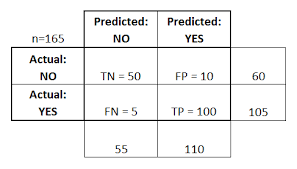

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10547   591]
 [ 2412  1103]]


<AxesSubplot:>

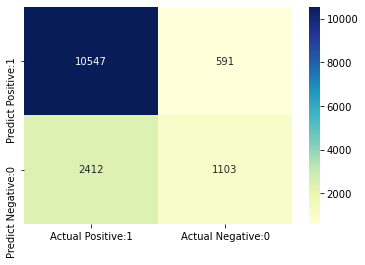

In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     11138
        >50K       0.65      0.31      0.42      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.63      0.65     14653
weighted avg       0.77      0.80      0.77     14653



In [40]:
# Plotting the probabilities obtained:

y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.874159e-01,0.012584
1,9.743071e-01,0.025693
2,1.525185e-04,0.999847
3,9.860409e-01,0.013959
4,9.996617e-01,0.000338
5,9.978722e-01,0.002128
6,9.937423e-01,0.006258
7,5.235889e-07,0.999999
8,9.874163e-01,0.012584
9,9.987698e-01,0.001230


In [41]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate. The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

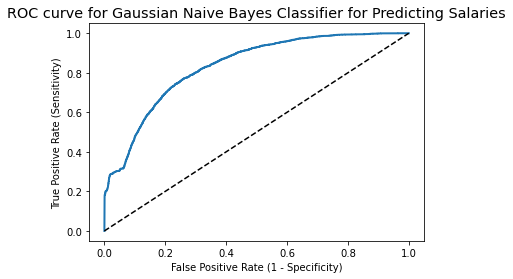

In [42]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### The area under (a ROC) curve is a measure of the accuracy of a quantitative diagnostic test. A test with no better accuracy than chance has an AUC of 0.5, a test with perfect accuracy has an AUC of 1. The AUC can be computed by adjusting the values in the matrix so that cells where the positive case outranks the negative case receive a 1 , cells where the negative case has higher rank receive a 0 , and cells with ties get 0.5 (since applying the sign function to the difference in scores gives values of 1, -1, and 0.

In [43]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8323


### Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

In [44]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8321


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79730915 0.79672419 0.8016964  0.78677976 0.79438432 0.78941211
 0.79409184 0.79701667 0.79613922 0.79607958]


In [46]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7950
